# Interférences entre symboles (démodulation d'un signal en bande de base sur un canal à bande limitée)

In [1]:
import numpy as np
import scipy.signal as sg
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('../../_static/graph.mplstyle')

In [2]:
# Forme d'onde
def h(t, T):
    return np.where( np.abs(t)<T/2, 1, 0)

# Filtre
def g(x):
    g = sg.firwin(100, .03)
    return np.convolve(x, g, 'same')

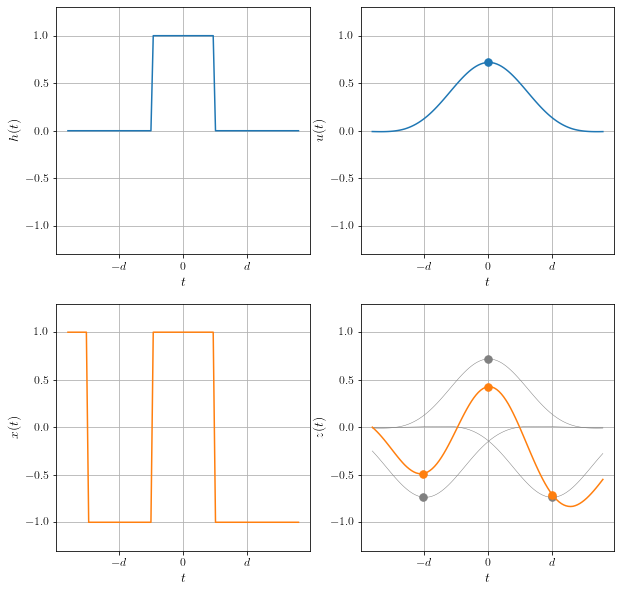

In [4]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

# Temps
T = 1
t = np.linspace(-T*1.8, T*1.8, 101)

# Indices des valeurs pour t = [0, T, -T]
n = np.zeros(3, dtype="int")
n[-1] = np.argmin(np.abs(t+T))
n[0] = np.argmin(np.abs(t))
n[1] = np.argmin(np.abs(t-T))

# Forme d'onde seule
x = h(t, T)
axs[0,0].plot(t, x, 'tab:blue')
axs[0,0].set_ylabel("$h(t)$")

# Forme d'onde seule filtrée
y = g(x)
axs[0,1].plot(t, y, 'tab:blue')
axs[0,1].plot(t[n[0]], y[n[0]], '.', color='tab:blue', markersize=15)
axs[0,1].set_ylabel("$u(t)$")

# Forme d'onde multiple
x = h(t, T) - h(t-T, T) - h(t+T, T) + h(t+2*T, T) - h(t-2*T, T)
axs[1,0].plot(t, x, 'tab:orange')
axs[1,0].set_ylabel("$x(t)$")

# Forme d'onde multiple filtrée
for k in [-1, 0, 1]:
    z = g(h(t-k*T, T)) * ((-1)**k)
    axs[1,1].plot(t, z, color='gray', linewidth=.5)
    axs[1,1].plot(t[n[k]], z[n[k]], '.', color='gray', markersize=15)
# axs[1,1].plot(t, g(h(t, T)), 'tab:blue', linestyle='--')
y = g(x)
axs[1,1].plot(t, y, 'tab:orange')
for k in [-1, 0, 1]:
    axs[1,1].plot(t[n[k]], y[n[k]], '.', color='tab:orange', markersize=15)
axs[1,1].set_ylabel("$z(t)$")

# Réglage de l'affichage des axes
for ax in axs.reshape(-1):
    ax.set_xticks([-1, 0, 1])
    ax.set_xticklabels(["$-d$", "$0$", "$d$"])
    ax.set_ylim([-1.3, 1.3])
    ax.set_xlabel("$t$")

# Enregistrement et affichage
plt.savefig("ies.svg")
plt.show()